In [1]:
from IPython.display import HTML, display

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
</script>''')

In [2]:
#######################################################
#         WELCOME TO HR ANALYTIC - DATA FILE          #
#######################################################
#  TO HAVE A BETTER EXPERIENCE CLICK THE BUTTON THAT  #
# SAYS 'NO TRUSTED' TO CHANGE THE STATUS TO 'TRUSTED' #
#                                                     # 
#    SELECT OPTION KERNEL --> RESTART & RUN ALL       #
#######################################################
#   CLICK THE "VOILA" BUTTON ABOVE TO RUN AS AN APP   #
#######################################################
#                                                     #
#            THANK YOU - ALEJANDRA COLACILLI          #
#                                                     #
#######################################################

In [3]:
from IPython.display import HTML, display
import qgrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

plt.style.use('seaborn-whitegrid')
train = pd.read_csv('https://raw.githubusercontent.com/Alecolacilli/HR_Analytics/master/HR_Analytic_train.csv')
qgrid_plot = pd.read_csv('https://raw.githubusercontent.com/Alecolacilli/HR_Analytics/master/HR_Analytic_qgrid.csv')

<h1 style="text-align: center;"><span style="color: #ff9900;">Data Analytic</span></h1>

The data analysis was done with more than 4,000 records as the initial load. These records were submitted by the last satisfaction survey performed by the company. 
75 % of these data were used for the training model and 25 % for the accuracy test.

<h2 style="text-align: left;"><span style="color: #ff9900;">Training Data Visualization</span></h2>

In [4]:


col_defs = {
    'ID': {
        'width': 35
    },
    'Marital ST': {
        'width': 80
    },
    'Salary Hike': {
        'width': 85
    },
    'Salary Hike': {
        'width': 85
    },
    'Years in Co.': {
        'width': 85
    },
    'Job Role': {
        'width': 70
    },
    'Job Level': {
        'width': 70
    }
    
}

df_widget = qgrid.show_grid(qgrid_plot, show_toolbar=True, column_definitions=col_defs, grid_options={
    # SlickGrid options
    'fullWidthRows': True,
    'syncColumnCellResize': True,
    'forceFitColumns': False,
    'defaultColumnWidth': 65,
    'rowHeight': 25,
    'enableColumnReorder': True,
    'enableTextSelectionOnCells': True,
    'editable': False,
    'autoEdit': False,
    'explicitInitialization': True,
    'filter_dropdown_shown': True,

    # Qgrid options
    'maxVisibleRows': 15,
    'minVisibleRows': 8,
    'sortable': True,
    'filterable': True,
    'highlightSelectedCell': False,
    'highlightSelectedRow': True},
    
    column_options={
    # SlickGrid column options
    'defaultSortAsc': True,
    'maxWidth': 200,
    'minWidth': 10,
    'resizable': True,
    'sortable': True,
    'toolTip': "",
    'width': None
})
df_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

<h2 style="text-align: left;"><span style="color: #ff9900;">Total Working Years & Age</span></h2>
There is a tendency to leave the company when the employees are younger, or when the number of years worked for the company is low.

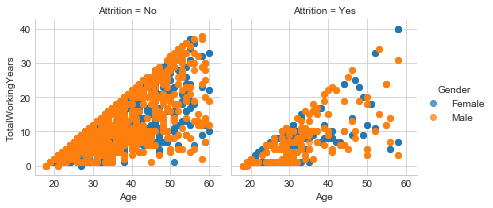

In [5]:
g = sns.FacetGrid(train, col="Attrition", hue="Gender")
g.map(plt.scatter, "Age", "TotalWorkingYears", alpha=.7);
g.add_legend();

<h2 style="text-align: left;"><span style="color: #ff9900;">Monthly Income & Age</span></h2>
The salary appears to be a key factor when it comes to deciding whether to stay or leave the company.  One of the biggest reasons why younger employees leave the company is low salaries.

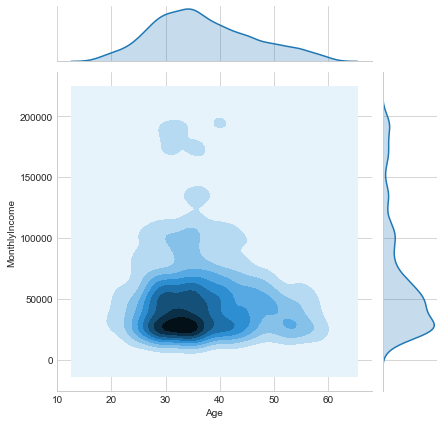

In [6]:
sns.jointplot(x="Age", y="MonthlyIncome", kind="kde", data=train);

<h2 style="text-align: left;"><span style="color: #ff9900;">Monthly Income & Years at Company</span></h2>
The number of years worked for the company is also a key factor when deciding to stay or leave the company. As we can see, those who have spent more years working for the company are more loyal even when their salaries are low.

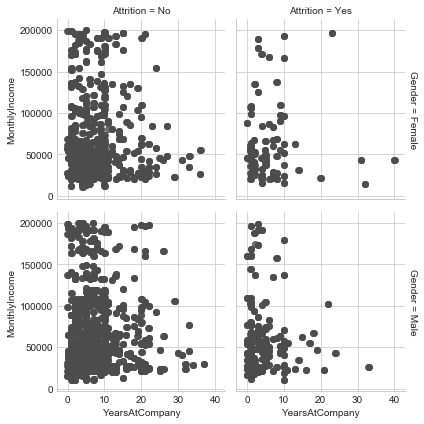

In [7]:
g = sns.FacetGrid(train, row="Gender", col="Attrition", margin_titles=True)
g.map(sns.regplot, "YearsAtCompany", "MonthlyIncome", color=".3", fit_reg=False, x_jitter=.1);